In [83]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/daily-covid-19-data-2020-2024/WHO-COVID-19-global-data.csv
/kaggle/input/daily-covid-19-data-2020-2024/Global COVID-19 Data (2020-2024)/Global COVID-19 Data (2020-2024)/WHO-COVID-19-global-table-data.csv
/kaggle/input/daily-covid-19-data-2020-2024/Global COVID-19 Data (2020-2024)/Global COVID-19 Data (2020-2024)/vaccination-metadata.csv
/kaggle/input/daily-covid-19-data-2020-2024/Global COVID-19 Data (2020-2024)/Global COVID-19 Data (2020-2024)/WHO-COVID-19-global-data.csv
/kaggle/input/daily-covid-19-data-2020-2024/Global COVID-19 Data (2020-2024)/Global COVID-19 Data (2020-2024)/vaccination-data.csv


---

>  #               **Covid-19 Data Analysis**: *COVID-19 Cases and Deaths World Wide (WHO Reporting)*

---

## <ins>Dataset Overview</ins>:
- #### **Source:** Kaggle
- #### **Time Period:** 2020-2024
- #### **Geography:** Global
- #### **Main Variables:** `Date_reported`, `Country`, `New_cases`, `Cumulative_cases`, `New_deaths`, `Cumulative_deaths`, etc. 

## <ins>Data Loading and Inspection</ins>

- ### Step 1: Importing the libraries:

In [84]:
import pandas as pd                    # For data processing like reading the csv file, and data analysis purposes
import matplotlib.pyplot as plt        # For data visualisation

- ### Step 2: Loading the dataset and reading csv file using Pandas library package:


In [85]:
covid = pd.read_csv("/kaggle/input/daily-covid-19-data-2020-2024/WHO-COVID-19-global-data.csv", sep=';')  # delimiter issue: specifying semi-colon delimiter by using 'sep' parameter.

covid       

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,05/01/2020,AF,Afghanistan,EMRO,NaN,0,NaN,0
1,12/01/2020,AF,Afghanistan,EMRO,NaN,0,NaN,0
2,19/01/2020,AF,Afghanistan,EMRO,NaN,0,NaN,0
3,26/01/2020,AF,Afghanistan,EMRO,NaN,0,NaN,0
4,02/02/2020,AF,Afghanistan,EMRO,NaN,0,NaN,0
...,...,...,...,...,...,...,...,...
57835,14/07/2024,ZW,Zimbabwe,AFRO,NaN,266385,NaN,5740
57836,21/07/2024,ZW,Zimbabwe,AFRO,1.0,266386,NaN,5740
57837,28/07/2024,ZW,Zimbabwe,AFRO,NaN,266386,NaN,5740
57838,04/08/2024,ZW,Zimbabwe,AFRO,NaN,266386,NaN,5740


- ### Step 3: Inspecting the dataset:

In [86]:
print(f'The number of (rows,columns):', covid.shape)

The number of (rows,columns): (57840, 8)


## <ins>Data Structure</ins>: 
#### There are 57,840 rows and 8 columns in this dataset.

In [87]:
n = covid['Country'].nunique()

print(f"The total number of different countries is {n}." )

The total number of different countries is 240.


## <ins>Key Feature</ins>:

#### **Geographic breakdown:** It includes data from 240 countries.

In [88]:
covid.head()             # Viewing the first few rows

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,05/01/2020,AF,Afghanistan,EMRO,NaN,0,NaN,0
1,12/01/2020,AF,Afghanistan,EMRO,NaN,0,NaN,0
2,19/01/2020,AF,Afghanistan,EMRO,NaN,0,NaN,0
3,26/01/2020,AF,Afghanistan,EMRO,NaN,0,NaN,0
4,02/02/2020,AF,Afghanistan,EMRO,NaN,0,NaN,0


In [89]:
covid.info()              # Checking the data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57840 entries, 0 to 57839
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date_reported      57840 non-null  object 
 1   Country_code       57599 non-null  object 
 2   Country            57840 non-null  object 
 3   WHO_region         53502 non-null  object 
 4   New_cases          39028 non-null  float64
 5   Cumulative_cases   57840 non-null  int64  
 6   New_deaths         25001 non-null  float64
 7   Cumulative_deaths  57840 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 3.5+ MB


## <ins>Missing Data</ins>:

In [90]:
covid.isnull().sum()      # Checking the null values

Date_reported            0
Country_code           241
Country                  0
WHO_region            4338
New_cases            18812
Cumulative_cases         0
New_deaths           32839
Cumulative_deaths        0
dtype: int64

The number of missing data in the each columns are:
- Country_code = 241
- WHO_region = 4338 
- New_cases = 18812 
- New_deaths = 32839

## <ins>Data Cleaning</ins>

- ### Step 4: Handling missing data:
    - #### Dropping or filling missing values based on the nature of the dataset

In [91]:
covid.Country_code.unique()                # Checking all the unique values of the Country_code column

array(['AF', 'AL', 'DZ', 'AS', 'AD', 'AO', 'AI', 'AG', 'AR', 'AM', 'AW',
       'AU', 'AT', 'AZ', 'BS', 'BH', 'BD', 'BB', 'BY', 'BE', 'BZ', 'BJ',
       'BM', 'BT', 'BO', 'BQ', 'BA', 'BW', 'BR', 'VG', 'BN', 'BG', 'BF',
       'BI', 'CV', 'KH', 'CM', 'CA', 'KY', 'CF', 'TD', 'CL', 'CN', 'CO',
       'KM', 'CG', 'CK', 'CR', 'CI', 'HR', 'CU', 'CW', 'CY', 'CZ', 'KP',
       'CD', 'DK', 'DJ', 'DM', 'DO', 'EC', 'EG', 'SV', 'GQ', 'ER', 'EE',
       'SZ', 'ET', 'FK', 'FO', 'FJ', 'FI', 'FR', 'GF', 'PF', 'GA', 'GM',
       'GE', 'DE', 'GH', 'GI', 'GR', 'GL', 'GD', 'GP', 'GU', 'GT', 'GG',
       'GN', 'GW', 'GY', 'HT', 'VA', 'HN', 'HU', 'IS', 'IN', 'ID', 'XXL',
       'XXF', 'XXJ', 'XXI', 'XXG', 'XXH', 'IR', 'IQ', 'IE', 'IM', 'IL',
       'IT', 'JM', 'JP', 'JE', 'JO', 'KZ', 'KE', 'KI', 'XK', 'KW', 'KG',
       'LA', 'LV', 'LB', 'LS', 'LR', 'LY', 'LI', 'LT', 'LU', 'MG', 'MW',
       'MY', 'MV', 'ML', 'MT', 'MH', 'MQ', 'MR', 'MU', 'YT', 'MX', 'FM',
       'MC', 'MN', 'ME', 'MS', 'MA', 'MZ', 'MM', na

In [92]:
covid.WHO_region.unique()               # Checking all the unique values of the WHO_region column

array(['EMRO', 'EURO', 'AFRO', 'WPRO', 'AMRO', 'SEARO', nan, 'OTHER'],
      dtype=object)

In [93]:
covid.New_cases.unique()               # Checking all the unique values of New_cases column and New_deaths column separately
covid.New_deaths.unique()

array([  nan,    2.,    3., ..., 1488.,  949.,  656.])

In [94]:
covid.loc[covid['New_cases'].isnull()]               # Displaying the dataframe where New_cases are null values.

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,05/01/2020,AF,Afghanistan,EMRO,NaN,0,NaN,0
1,12/01/2020,AF,Afghanistan,EMRO,NaN,0,NaN,0
2,19/01/2020,AF,Afghanistan,EMRO,NaN,0,NaN,0
3,26/01/2020,AF,Afghanistan,EMRO,NaN,0,NaN,0
4,02/02/2020,AF,Afghanistan,EMRO,NaN,0,NaN,0
...,...,...,...,...,...,...,...,...
57830,09/06/2024,ZW,Zimbabwe,AFRO,NaN,266365,NaN,5740
57835,14/07/2024,ZW,Zimbabwe,AFRO,NaN,266385,NaN,5740
57837,28/07/2024,ZW,Zimbabwe,AFRO,NaN,266386,NaN,5740
57838,04/08/2024,ZW,Zimbabwe,AFRO,NaN,266386,NaN,5740


In [95]:
covid.loc[covid['WHO_region'].isnull()]              # Displaying the dataframe where WHO_region are null values.

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
16388,05/01/2020,FK,Falkland Islands (Malvinas),NaN,NaN,0,NaN,0
16389,12/01/2020,FK,Falkland Islands (Malvinas),NaN,NaN,0,NaN,0
16390,19/01/2020,FK,Falkland Islands (Malvinas),NaN,NaN,0,NaN,0
16391,26/01/2020,FK,Falkland Islands (Malvinas),NaN,NaN,0,NaN,0
16392,02/02/2020,FK,Falkland Islands (Malvinas),NaN,NaN,0,NaN,0
...,...,...,...,...,...,...,...,...
45303,14/07/2024,PM,Saint Pierre and Miquelon,NaN,NaN,3426,NaN,2
45304,21/07/2024,PM,Saint Pierre and Miquelon,NaN,NaN,3426,NaN,2
45305,28/07/2024,PM,Saint Pierre and Miquelon,NaN,NaN,3426,NaN,2
45306,04/08/2024,PM,Saint Pierre and Miquelon,NaN,NaN,3426,NaN,2


In [96]:
# Making a new copy called "df_cleaned" of the original "covid" DataFrame 

df_cleaned = covid.copy()     

In [97]:
# Removing the missing entries from the Country_code column as they represent a very small portion of the data i.e less than 1%.

df_cleaned = df_cleaned.dropna(subset=['Country_code'])

df_cleaned.isnull().sum()

Date_reported            0
Country_code             0
Country                  0
WHO_region            4338
New_cases            18769
Cumulative_cases         0
New_deaths           32723
Cumulative_deaths        0
dtype: int64

In [98]:
# Replacing NaN or missing values in column 'WHO_region' with 'OTHER'. Note: We would get the same result also by filling those missing values with 'OTHER' using fillna() function.

df_cleaned['WHO_region'] = df_cleaned['WHO_region'].replace(np.nan,'OTHER')

df_cleaned.WHO_region.unique()  

array(['EMRO', 'EURO', 'AFRO', 'WPRO', 'AMRO', 'SEARO', 'OTHER'],
      dtype=object)

In [99]:
df_cleaned.isnull().sum()

Date_reported            0
Country_code             0
Country                  0
WHO_region               0
New_cases            18769
Cumulative_cases         0
New_deaths           32723
Cumulative_deaths        0
dtype: int64

In [100]:
# Filling the missing values of New_cases with 0.

df_cleaned['New_cases'] = df_cleaned['New_cases'].fillna('0')

In [126]:
# Above, I made a mistake of putting the value 0 in quotation mark and storing the values as string or object instead of number datatype. So,now replacing the string '0' to number 0. This way, the column New_cases retains it original float datatype.

df_cleaned['New_cases'] = df_cleaned['New_cases'].replace('0',0)

In [102]:
df_cleaned.info()                                     # Checking the data type of New_cases.

<class 'pandas.core.frame.DataFrame'>
Index: 57599 entries, 0 to 57839
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date_reported      57599 non-null  object 
 1   Country_code       57599 non-null  object 
 2   Country            57599 non-null  object 
 3   WHO_region         57599 non-null  object 
 4   New_cases          57599 non-null  float64
 5   Cumulative_cases   57599 non-null  int64  
 6   New_deaths         24876 non-null  float64
 7   Cumulative_deaths  57599 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.0+ MB


In [127]:
df_cleaned["New_deaths"].isnull().sum()             # Now, the number of missing data in "New_deaths" column is Zero.

0

In [104]:
# Filling the rest of the missing values (i.e. from the last remaining column 'New_deaths') with 0.

df_cleaned.fillna(0, inplace=True)

In [105]:
df_cleaned.isnull().sum()

Date_reported        0
Country_code         0
Country              0
WHO_region           0
New_cases            0
Cumulative_cases     0
New_deaths           0
Cumulative_deaths    0
dtype: int64

In [106]:
df_cleaned.duplicated().sum()                                 # Checking for duplicate rows in the DataFrame         

0

#### Our dataset is now complete and so is the data cleaning process.

## <ins>Exploratory Data Analysis (EDA)</ins>

- ### Step 5: Summary statistics of numerical columns:

In [107]:
df_cleaned.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,5.759900e+04,5.759900e+04,57599.000000,5.759900e+04
mean,1.346802e+04,1.799611e+06,122.472144,2.008246e+04
std,2.230882e+05,7.813230e+06,812.211867,8.202777e+04
min,-6.507900e+04,0.000000e+00,-3432.000000,0.000000e+00
25%,0.000000e+00,4.115500e+03,0.000000,2.800000e+01
50%,4.700000e+01,4.585200e+04,0.000000,5.520000e+02
75%,1.250000e+03,5.317235e+05,12.000000,7.118000e+03
max,4.047548e+07,1.034368e+08,47687.000000,1.194158e+06


## <ins> Data Visualization Using Matplotlib </ins>

- ### Step 6: Plot a line graph (e.g., for time-series data):

In [108]:
df_cleaned

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,05/01/2020,AF,Afghanistan,EMRO,0.0,0,0.0,0
1,12/01/2020,AF,Afghanistan,EMRO,0.0,0,0.0,0
2,19/01/2020,AF,Afghanistan,EMRO,0.0,0,0.0,0
3,26/01/2020,AF,Afghanistan,EMRO,0.0,0,0.0,0
4,02/02/2020,AF,Afghanistan,EMRO,0.0,0,0.0,0
...,...,...,...,...,...,...,...,...
57835,14/07/2024,ZW,Zimbabwe,AFRO,0.0,266385,0.0,5740
57836,21/07/2024,ZW,Zimbabwe,AFRO,1.0,266386,0.0,5740
57837,28/07/2024,ZW,Zimbabwe,AFRO,0.0,266386,0.0,5740
57838,04/08/2024,ZW,Zimbabwe,AFRO,0.0,266386,0.0,5740


In [109]:
# Grouping the data by Date_reported column to summarize as the total number of COVID-19 cases in each date

g = df_cleaned.groupby('Date_reported')['Cumulative_cases'].max()

g

Date_reported
01/01/2023     99411696
01/03/2020        79968
01/05/2022     80626043
01/08/2021     34784102
01/10/2023    103436829
                ...    
31/03/2024    103436829
31/05/2020      1785422
31/07/2022     90232883
31/10/2021     45639685
31/12/2023    103436829
Name: Cumulative_cases, Length: 241, dtype: int64

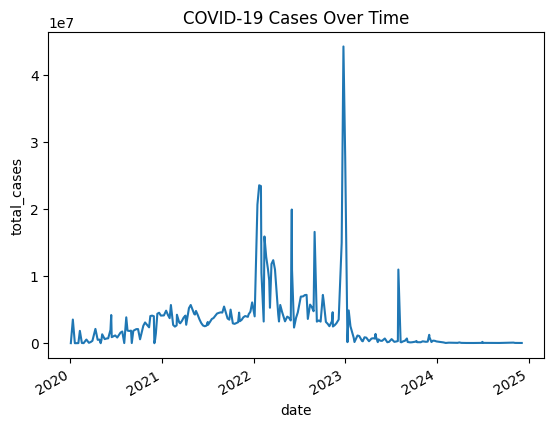

In [128]:
# Plotting Cases in a line graph using pivot table.

p = df_cleaned.pivot_table(index='Date_reported', values='New_cases', aggfunc='sum')

p_sorted = p.sort_index()                 
# p_sorted = p.sort_values(by='New_cases')

p_sorted.plot(xlabel='date', ylabel='total_cases', title='COVID-19 Cases Over Time')

# Removing the legend
plt.legend('', frameon=False)

plt.show()

In [111]:
# Converting "Date_reported" datatype from object to datetime.

df_cleaned['Date_reported'] = pd.to_datetime(df_cleaned['Date_reported'],format='mixed')     

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57599 entries, 0 to 57839
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date_reported      57599 non-null  datetime64[ns]
 1   Country_code       57599 non-null  object        
 2   Country            57599 non-null  object        
 3   WHO_region         57599 non-null  object        
 4   New_cases          57599 non-null  float64       
 5   Cumulative_cases   57599 non-null  int64         
 6   New_deaths         57599 non-null  float64       
 7   Cumulative_deaths  57599 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 4.0+ MB


In [112]:
# At the far right of the DataFrame, adding new columns called 'Year', 'Month' and 'Day' from 'Date_reported' column.

df_cleaned['Year'] = df_cleaned['Date_reported'].dt.year
df_cleaned['Month'] = df_cleaned['Date_reported'].dt.month
df_cleaned['Day'] = df_cleaned['Date_reported'].dt.day

df_cleaned

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Year,Month,Day
0,2020-05-01,AF,Afghanistan,EMRO,0.0,0,0.0,0,2020,5,1
1,2020-12-01,AF,Afghanistan,EMRO,0.0,0,0.0,0,2020,12,1
2,2020-01-19,AF,Afghanistan,EMRO,0.0,0,0.0,0,2020,1,19
3,2020-01-26,AF,Afghanistan,EMRO,0.0,0,0.0,0,2020,1,26
4,2020-02-02,AF,Afghanistan,EMRO,0.0,0,0.0,0,2020,2,2
...,...,...,...,...,...,...,...,...,...,...,...
57835,2024-07-14,ZW,Zimbabwe,AFRO,0.0,266385,0.0,5740,2024,7,14
57836,2024-07-21,ZW,Zimbabwe,AFRO,1.0,266386,0.0,5740,2024,7,21
57837,2024-07-28,ZW,Zimbabwe,AFRO,0.0,266386,0.0,5740,2024,7,28
57838,2024-04-08,ZW,Zimbabwe,AFRO,0.0,266386,0.0,5740,2024,4,8


In [129]:
# Grouping the data by Year, applying the aggregation: sum, to New_cases to summarise the data as the sum of New_cases and finally sorting the data in order of Year.

date_newCases=df_cleaned.groupby("Year").agg({"New_cases":"sum"}).reset_index().sort_values(by="Year")

date_newCases

,Year,New_cases
0,2020,80294867.0
1,2021,200173450.0
2,2022,423993008.0
3,2023,69170698.0
4,2024,2112546.0


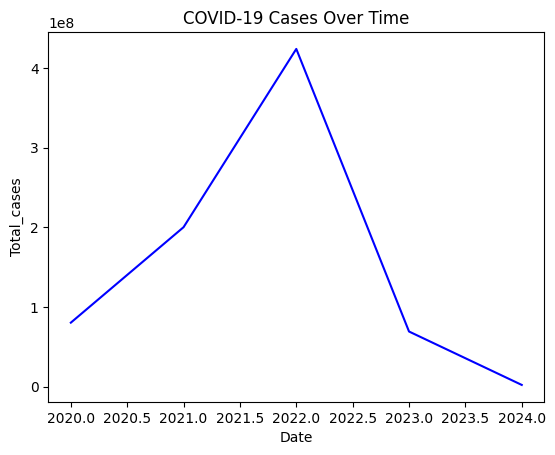

In [114]:
# Plotting Cases in a line graph.

ax = date_newCases.plot(x='Year', y='New_cases', title='COVID-19 Cases Over Time', c='blue')
ax.set_xlabel('Date')                         # Renaming x-axis label
ax.set_ylabel('Total_cases')                  # Renaming y-axis label
ax.legend('', frameon=False)                  # Removing the legend
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


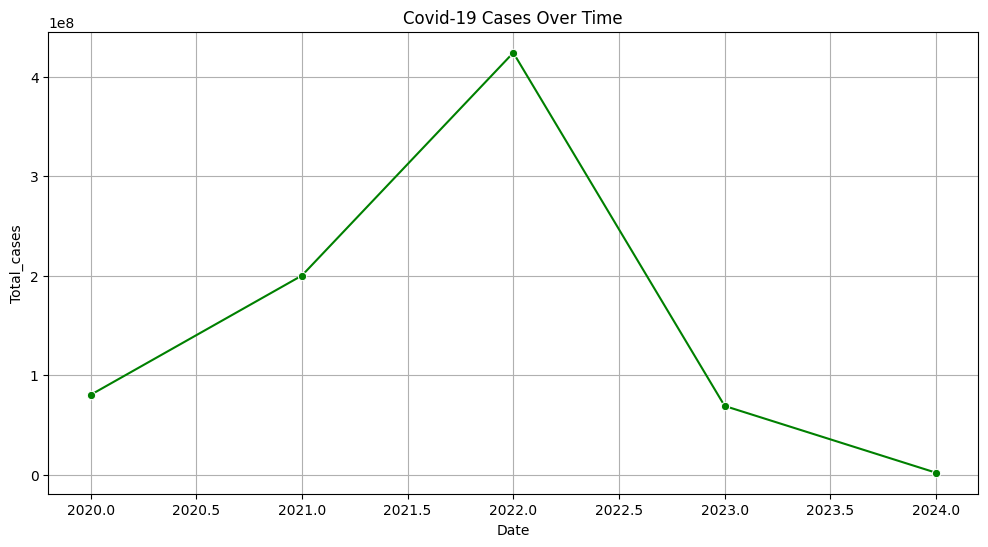

In [130]:
# Plotting Cases in a line graph using seaborn library.

import seaborn as sns

plt.figure(figsize=(12,6))               # The first number 12 represents the width and the second number 6 represents the height of the chart in inches.
plt.grid(True)                           # This line displays the gridline in the graph.
ax = sns.lineplot(data=date_newCases,x="Year",y="New_cases",marker="o", color='Green')
ax.set(xlabel='Date', ylabel='Total_cases')
ax.set_title('Covid-19 Cases Over Time')
plt.show()

- ### Step 7: Create a bar chart (e.g., for country comparisons):

#### Column chart displaying the top 5 countries with the highest total number of COVID-19 cases reported up to the most recent date in the dataset.

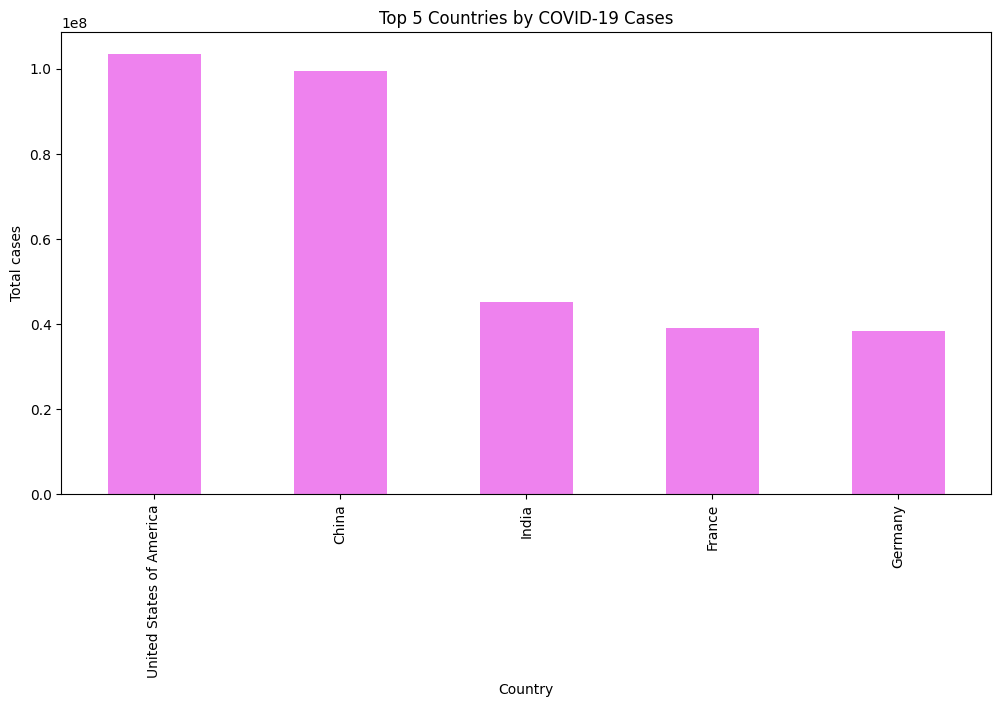

In [133]:
top_5 = df_cleaned.groupby('Country')['Cumulative_cases'].max().nlargest(5)
plt.figure(figsize=(12,6))
top_5.plot(kind='bar', title='Top 5 Countries by COVID-19 Cases', color='violet')
plt.ylabel('Total cases')
plt.show()

In [117]:
print(top_5)

Country
United States of America    103436829
China                        99375079
India                        45042054
France                       38997490
Germany                      38437756
Name: Cumulative_cases, dtype: int64


## <ins>Advanced EDA</ins>

- ### Step 10: Create a rolling average for smoother time-series analysis:

In [118]:
# Creating a rolling average from the original DataFrame.

df_cleaned['7-day_avg'] = df_cleaned['New_cases'].rolling(window=7).mean()

df_cleaned

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Year,Month,Day,7-day_avg
0,2020-05-01,AF,Afghanistan,EMRO,0.0,0,0.0,0,2020,5,1,NaN
1,2020-12-01,AF,Afghanistan,EMRO,0.0,0,0.0,0,2020,12,1,NaN
2,2020-01-19,AF,Afghanistan,EMRO,0.0,0,0.0,0,2020,1,19,NaN
3,2020-01-26,AF,Afghanistan,EMRO,0.0,0,0.0,0,2020,1,26,NaN
4,2020-02-02,AF,Afghanistan,EMRO,0.0,0,0.0,0,2020,2,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
57835,2024-07-14,ZW,Zimbabwe,AFRO,0.0,266385,0.0,5740,2024,7,14,2.857143
57836,2024-07-21,ZW,Zimbabwe,AFRO,1.0,266386,0.0,5740,2024,7,21,3.000000
57837,2024-07-28,ZW,Zimbabwe,AFRO,0.0,266386,0.0,5740,2024,7,28,3.000000
57838,2024-04-08,ZW,Zimbabwe,AFRO,0.0,266386,0.0,5740,2024,4,8,1.714286


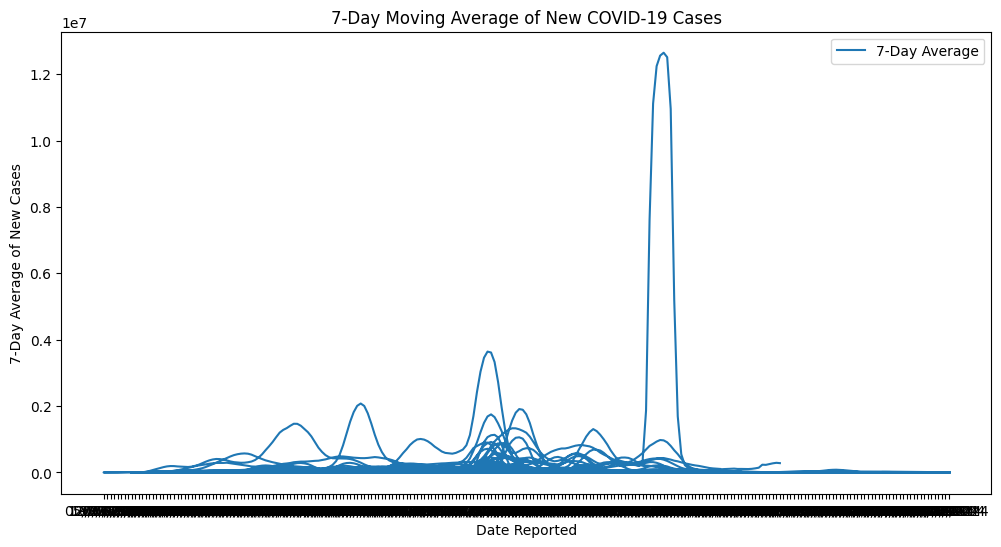

In [119]:
# Calculate the 7-day moving average                                                       # 'covid' DataFrame
covid['7-day_avg'] = covid['New_cases'].rolling(window=7).mean()

# Drop rows with null values in '7-day_avg'
# covid = covid.dropna(subset=['7-day_avg'])

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(covid['Date_reported'], covid['7-day_avg'], label='7-Day Average')

# Add legend and show the plot
plt.legend()
plt.ylabel('7-Day Average of New Cases')
plt.xlabel('Date Reported')
plt.title('7-Day Moving Average of New COVID-19 Cases')
plt.show()


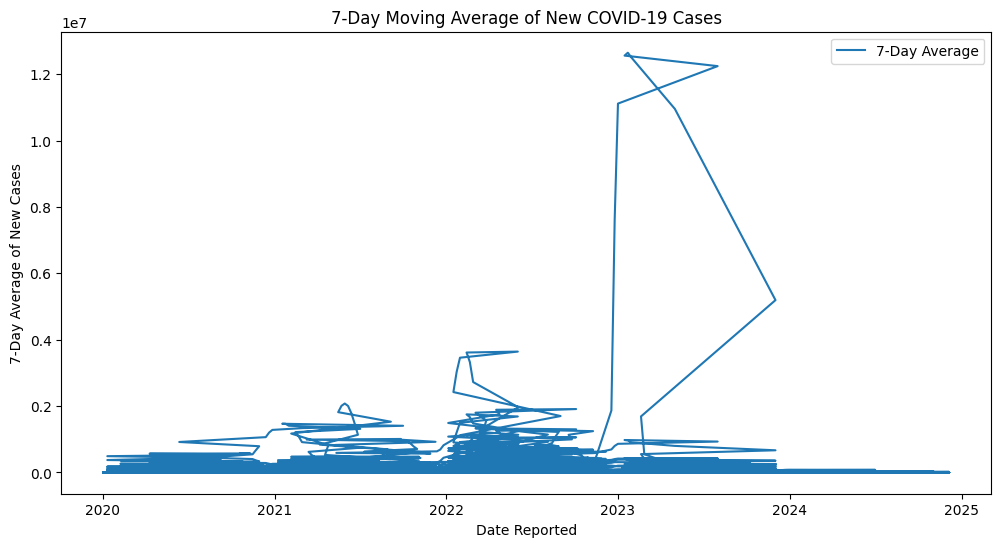

In [120]:
# Calculate the 7-day moving average                                                       # 'df_cleaned' DataFrame
df_cleaned['7-day_avg'] = df_cleaned['New_cases'].rolling(window=7).mean()

# Drop rows with null values in '7-day_avg'
# df_cleaned = df_cleaned.dropna(subset=['7-day_avg'])
  
# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(df_cleaned['Date_reported'], df_cleaned['7-day_avg'], label='7-Day Average')

# Add legend and show the plot
plt.legend()
plt.ylabel('7-Day Average of New Cases')
plt.xlabel('Date Reported')
plt.title('7-Day Moving Average of New COVID-19 Cases')
plt.show()


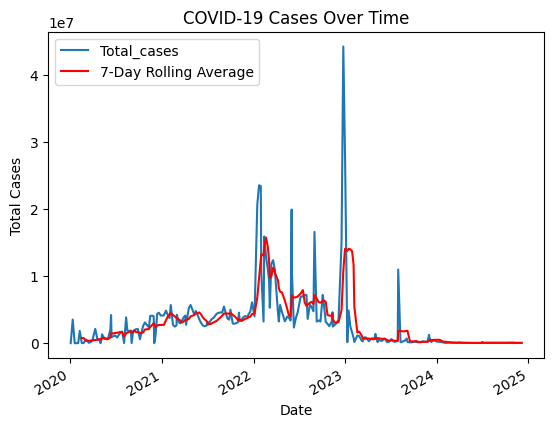

In [121]:
# Creating a rolling average by using pivot table.                     # 'df_cleaned' DataFrame

# This graph shows both data - the orignal time-series(Blue coloured) and the smoothed rolling average(Red coloured).

# By creating a pivot table
p = df_cleaned.pivot_table(index='Date_reported', values='New_cases', aggfunc='sum')
p_sorted = p.sort_index()

# Calculating the rolling average with a window of 7 days
p_sorted['Rolling_Avg'] = p_sorted['New_cases'].rolling(window=7).mean()

# Plotting Cases in a line graph
ax = p_sorted.plot(y='New_cases', title='COVID-19 Cases Over Time', label='Total_cases')
p_sorted.plot(y='Rolling_Avg', ax=ax, color='red', label='7-Day Rolling Average')

# Renaming x-axis and y-axis labels
ax.set_xlabel('Date')
ax.set_ylabel('Total Cases')

# Displaying the legend
ax.legend()

# Show the plot
plt.show()


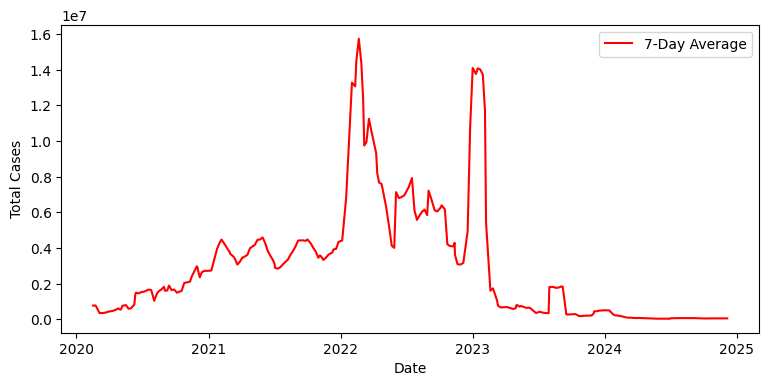

In [122]:
# This graph shows only the smoothed rolling average (or moving average) data.

plt.figure(figsize=(9, 4))                              # Making the figure bigger

# By creating a pivot table
p = df_cleaned.pivot_table(index='Date_reported', values='New_cases', aggfunc='sum')
p_sorted = p.sort_index()

# Calculating the rolling average with a window of 7 days
p_sorted['7-day_avg'] = p_sorted['New_cases'].rolling(window=7).mean()

# Plotting the 7-day rolling average in a line graph
plt.plot(p_sorted.index, p_sorted['7-day_avg'], label='7-Day Average', color='red')

# Renaming x-axis and y-axis labels
plt.xlabel('Date')
plt.ylabel('Total Cases')

# Displaying the legend
plt.legend()

# Show the plot
plt.show()


- #### Plotting a Scatter graph to see the corelation between Covid_cases and Covid_deaths: 

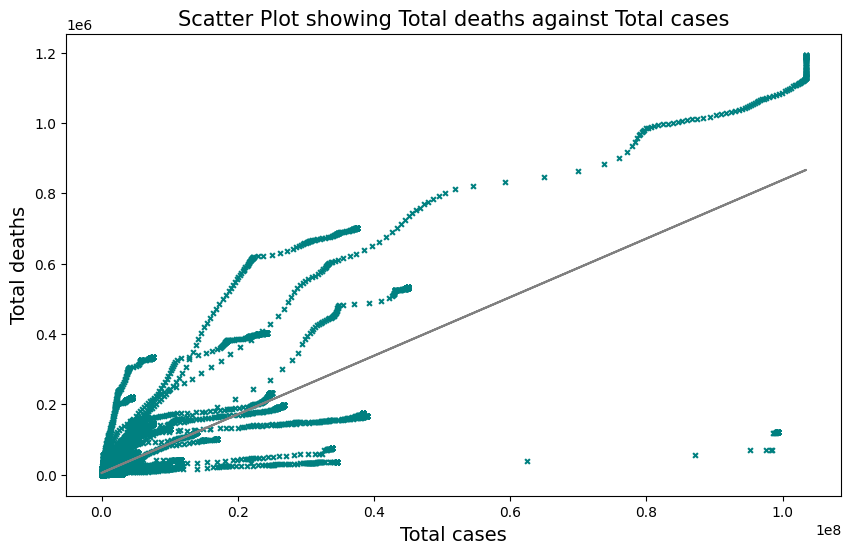

In [123]:
x = df_cleaned['Cumulative_cases']
y = df_cleaned['Cumulative_deaths']

plt.figure(figsize=(10,6))

# creating a scatter plot
plt.scatter(x,y, marker='x', s=12, c='teal')                                                # s = marker size, c = colour
plt.title('Scatter Plot showing Total deaths against Total cases', fontsize=15)             # adding title 

# adding axis labels
plt.xlabel('Total cases', fontsize=14) 
plt.ylabel('Total deaths', fontsize=14)

# calculating the trend line
z = np.polyfit(x, y, 1)                                                                     # 1 means linear trend line
p = np.poly1d(z)

# adding the trend line to the plot
plt.plot(x, p(x), color='grey')

# showing the plot
plt.show()

In the above scatter plot, the points are moving in a higher/ forward trend, which means - as the number of Covid cases has increased, so has the number of deaths.

- ### A Pie chart displaying the top 7 countries having the highest deaths:

In [124]:
# Grouping by 'Country' and getting the maximum 'Cumulative_deaths', then selecting the top 7.

top_7 = df_cleaned.groupby('Country')['Cumulative_deaths'].max().nlargest(7)

top_7

Country
United States of America                                1194158
Brazil                                                   702116
India                                                    533626
Russian Federation                                       403202
Mexico                                                   334586
United Kingdom of Great Britain and Northern Ireland     232112
Peru                                                     220975
Name: Cumulative_deaths, dtype: int64

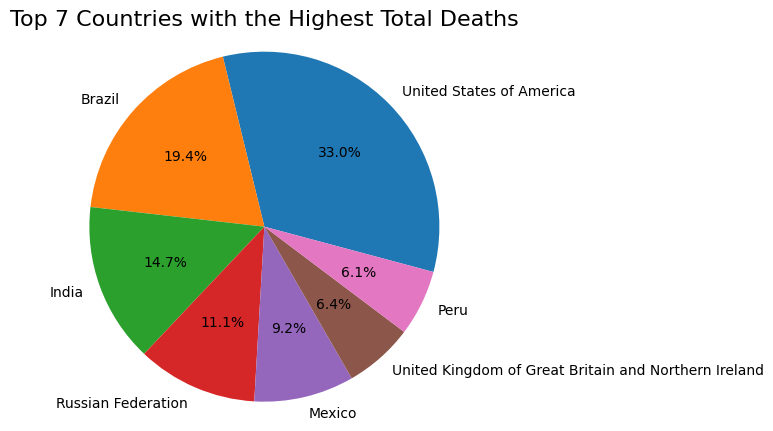

In [154]:
top_7 = df_cleaned.groupby('Country')['Cumulative_deaths'].max().nlargest(7)

# Plotting the pie chart
plt.figure(figsize=(6,5))
plt.pie(top_7, labels=top_7.index, autopct='%1.1f%%', startangle=345)               # autopct='%1.1f%%': This parameter formats the percentage display on each slice of the pie chart. '%1.1f%%' means that the percentage will be displayed with one decimal place. For example, 25.3%.
plt.title('Top 7 Countries with the Highest Total Deaths', fontsize=16)
plt.axis('equal')                                                                   # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## <ins>Summary Insights</ins>

- ### Analyze and explain findings from your visualizations.

### <ins>Data Description</ins>:

#### This dataset, obtained from Kaggle, is originally collected from the World Health Organization (WHO). It contains global data on COVID-19 cases and deaths by country from the year 2020 to 2024. Data is compiled from WHO’s daily updates and statistical releases with weekly updates. Expected update frequency on Kaggle is Quarterly. Missing values were minimal. The dataset is suitable for time-series analysis, trend identification, and cross-country comparisons.

### <ins>Potential Uses</ins>:

#### This dataset can be used for time-series analysis, analyzing pandemic trends, learning and research.

#### From the plotting of the line graph, Covid pandemic appeared to rise from the year 2020, peaking highest from 2022 to 2023 and then reducing in cases since then. According to the column chart, USA had the highest number of Covid cases, closely followed by China and then India. In terms of deaths, USA faced the highest toll, after that was Brazil and then India. Unsurprisingly, the number of cases and deaths caused due to Covid disease seemed to go hand in hand as suggested by the upward trend of the scatter plot. The positive slope indicates a direct relationship between the cases and the deaths, althought it doesn't imply causation. We also created a rolling average of the initial time-series data. In our case, the 7-day rolling average (also called moving average) was calculated by taking the average of 7 consecutive data points (window size of 7 days) in the data set. This reduces the noise in the data by averaging data points and smoothing out the random fluctuations to show the overall trend, anomalies and outliers by comparing the original data with the smoothed data. In this particular case, no anomalies or outliers were found as the original data and the smoothed data matched and were consistent since we cleansed the data beforehand by removing all the null values with zero duplicates.   

#### So, we conclude the analysis by saying that in this project, we used python for real-world data analysis and visualisation using libraries like Pandas, Matplotlib, etc, to load, view and cleanse dataset followed by visualisation.